In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import os 
import datetime
from scipy import stats
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap

In [2]:
vis = pd.read_csv("vis_12_2021_01_2022.csv", index_col=[0])
vis.index = pd.to_datetime(vis.index, format="%d/%m/%Y")
vis

,ABK,ABE,ABU,ADO,AKU,ASA,AWK,BAU,BEN,BID,...,POT,SHA,SOK,UMU,UYO,WAR,YEL,YOL,ZAR,YEN
date,,,,,,,,,,,,,,,,,,,,,
2021-12-01,10.0,13.0,10.0,12.0,10.0,10.0,10.0,10.0,10.0,10.0,...,NaN,10.0,10.0,16.0,6.0,20.0,5.3,10.0,8.0,10.0
2021-12-02,10.0,10.0,10.0,10.0,8.0,10.0,10.0,1.5,10.0,10.0,...,NaN,20.0,7.0,NaN,10.0,20.0,20.0,1.0,3.0,NaN
2021-12-03,10.0,13.0,3.0,13.0,10.0,10.0,10.0,1.0,10.0,1.0,...,NaN,20.0,3.0,15.0,7.0,20.0,1.5,1.6,1.0,10.0
2021-12-04,8.0,12.0,5.0,4.5,8.0,8.0,8.0,6.0,6.0,1.0,...,NaN,15.0,4.0,8.0,8.0,10.0,1.5,2.0,2.0,10.0
2021-12-05,7.0,8.0,4.0,3.0,5.0,8.0,8.0,8.0,7.0,1.0,...,NaN,2.5,10.0,7.0,3.0,NaN,3.5,5.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-27,5.0,5.0,5.0,1.0,2.0,3.0,1.5,0.8,1.8,4.0,...,NaN,7.0,1.0,8.0,3.0,10.0,3.5,0.4,1.5,1.5
2022-01-28,2.5,5.0,1.0,0.5,1.8,2.5,1.6,0.8,2.2,0.8,...,NaN,7.0,0.8,NaN,3.0,10.0,1.0,0.6,1.0,1.5
2022-01-29,1.5,5.0,1.2,1.0,1.0,2.0,1.0,2.0,1.5,0.8,...,NaN,NaN,1.8,1.8,1.0,10.0,1.2,5.0,1.0,1.5


In [3]:
stn_coord = pd.read_csv("coords.csv")
stn = stn_coord["stn"]
stn_lat = stn_coord["lat"]
stn_lon = stn_coord["lon"]

In [4]:
# cap visibility maximum to 10km
vis.columns
for i in vis.columns:
    vis[i] = np.where(vis[i] > 10, 10, vis[i])
vis
# df["Income"] = np.where(df["Income"] <2960.0, 2960.0,df['Income'])

,ABK,ABE,ABU,ADO,AKU,ASA,AWK,BAU,BEN,BID,...,POT,SHA,SOK,UMU,UYO,WAR,YEL,YOL,ZAR,YEN
date,,,,,,,,,,,,,,,,,,,,,
2021-12-01,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,NaN,10.0,10.0,10.0,6.0,10.0,5.3,10.0,8.0,10.0
2021-12-02,10.0,10.0,10.0,10.0,8.0,10.0,10.0,1.5,10.0,10.0,...,NaN,10.0,7.0,NaN,10.0,10.0,10.0,1.0,3.0,NaN
2021-12-03,10.0,10.0,3.0,10.0,10.0,10.0,10.0,1.0,10.0,1.0,...,NaN,10.0,3.0,10.0,7.0,10.0,1.5,1.6,1.0,10.0
2021-12-04,8.0,10.0,5.0,4.5,8.0,8.0,8.0,6.0,6.0,1.0,...,NaN,10.0,4.0,8.0,8.0,10.0,1.5,2.0,2.0,10.0
2021-12-05,7.0,8.0,4.0,3.0,5.0,8.0,8.0,8.0,7.0,1.0,...,NaN,2.5,10.0,7.0,3.0,NaN,3.5,5.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-27,5.0,5.0,5.0,1.0,2.0,3.0,1.5,0.8,1.8,4.0,...,NaN,7.0,1.0,8.0,3.0,10.0,3.5,0.4,1.5,1.5
2022-01-28,2.5,5.0,1.0,0.5,1.8,2.5,1.6,0.8,2.2,0.8,...,NaN,7.0,0.8,NaN,3.0,10.0,1.0,0.6,1.0,1.5
2022-01-29,1.5,5.0,1.2,1.0,1.0,2.0,1.0,2.0,1.5,0.8,...,NaN,NaN,1.8,1.8,1.0,10.0,1.2,5.0,1.0,1.5


In [5]:
vis['KAN'].describe()

count    60.000000
mean      5.536667
std       3.545537
min       0.300000
25%       2.000000
50%       5.500000
75%      10.000000
max      10.000000
Name: KAN, dtype: float64

In [6]:
bsc = xr.open_dataset("nc_files/NCEP-NGAC/20211201_NCEP-NGAC.nc")
bsc


<xarray.Dataset>
Dimensions:     (time: 25, longitude: 381, latitude: 301)
Coordinates:
  * time        (time) datetime64[ns] 2021-12-01 ... 2021-12-04
  * longitude   (longitude) float64 -30.0 -29.75 -29.5 ... 64.5 64.75 65.0
  * latitude    (latitude) float64 -5.0 -4.75 -4.5 -4.25 ... 69.5 69.75 70.0
Data variables:
    OD550_DUST  (time, latitude, longitude) float32 ...
    SCONC_DUST  (time, latitude, longitude) float32 ...
Attributes:
    CDI:                  Climate Data Interface version 1.9.7.1 (http://mpim...
    Conventions:          COARDS
    history:              Wed Dec 01 12:40:31 2021: cdo -s -r settaxis,2021-1...
    History:              created by wgrib2
    GRIB2_grid_template:  0
    NCO:                  netCDF Operators version 4.9.5 (Homepage = http://n...
    CDO:                  Climate Data Operators version 1.9.7.1 (http://mpim...

In [7]:
# 11 19
bsc.time.to_series()[19]

Timestamp('2021-12-03 09:00:00')

In [8]:
nc_files = os.listdir("nc_files/NCEP-NGAC/")
len(nc_files)

60

In [9]:
day1_lead_all = pd.DataFrame(columns=["stn", "lon", "lat"])
for nc_file in nc_files:
    bsc = xr.open_dataset("nc_files/NCEP-NGAC/"+nc_file)
    day1_lead = [["stn", "lon", "lat", bsc.OD550_DUST.time.to_series()[19]]]
    for i in range(len(stn)):
        day1_bsc = bsc.OD550_DUST.isel(time = 19).sel(latitude = stn_lat[i], 
                                                     longitude = stn_lon[i], 
                                                     method = 'nearest')
        day1_lead.append([stn[i], stn_lon[i], stn_lat[i], day1_bsc.to_dict()["data"]])
    day1_lead = pd.DataFrame(day1_lead[1:len(day1_lead)], columns = day1_lead[0])
    day1_lead_all = day1_lead_all.merge(day1_lead, 
                                        left_on=["stn", "lon", "lat"], 
                                        right_on=["stn", "lon", "lat"],
                                        how = "outer")
#data for 1 day leadtime for all sations
day1_lead_all

,stn,lon,lat,2021-12-03 09:00:00,2021-12-04 09:00:00,2021-12-05 09:00:00,2021-12-06 09:00:00,2021-12-07 09:00:00,2021-12-08 09:00:00,2021-12-09 09:00:00,...,2022-01-24 09:00:00,2022-01-25 09:00:00,2022-01-26 09:00:00,2022-01-27 09:00:00,2022-01-28 09:00:00,2022-01-29 09:00:00,2022-01-30 09:00:00,2022-01-31 09:00:00,2022-02-01 09:00:00,2022-02-02 09:00:00
0,ABE,3.33,7.20,0.198820,0.295732,0.388629,0.276185,0.202568,0.259850,0.222659,...,0.377406,0.318259,0.301220,0.308347,0.317112,0.834355,0.707216,0.493077,0.361923,0.327107
1,ABK,8.19,6.25,0.243794,0.277447,0.288522,0.257049,0.221123,0.226919,0.261776,...,0.300810,0.313754,0.355943,0.326369,0.481362,0.563036,0.492749,0.418202,0.421970,0.435077
2,ABU,7.20,9.00,0.261694,0.330220,0.412222,0.283198,0.234517,0.355779,0.284611,...,0.400630,0.376341,0.428769,0.427213,0.816251,0.757269,0.550953,0.410255,0.346686,0.321143
3,ADO,5.20,7.60,0.196076,0.307331,0.271237,0.275301,0.206459,0.267387,0.241152,...,0.335340,0.322970,0.310149,0.364954,0.418038,0.715735,0.680305,0.427377,0.372859,0.317047
4,AKU,5.30,7.20,0.194192,0.290718,0.277545,0.272794,0.199721,0.268288,0.238060,...,0.353526,0.316580,0.301957,0.389202,0.427295,0.668713,0.704635,0.394363,0.398910,0.317260
5,ASA,6.23,6.82,0.229131,0.228819,0.288277,0.269976,0.207790,0.269271,0.282133,...,0.389202,0.335749,0.394936,0.410993,0.652165,0.621855,0.532153,0.346276,0.450601,0.368345
6,AWK,7.07,6.20,0.209920,0.248775,0.281641,0.259179,0.215614,0.239780,0.267367,...,0.357007,0.338412,0.400343,0.378880,0.664126,0.584254,0.483656,0.429261,0.456827,0.406602
7,BAU,9.82,10.28,0.470139,0.379257,0.327025,0.309527,0.411013,0.344883,0.641884,...,0.416318,0.649871,0.686326,1.044972,1.119027,0.999588,0.558899,0.574177,0.772752,0.442434
8,BEN,5.60,6.33,0.231957,0.217776,0.273285,0.269468,0.202752,0.277381,0.259850,...,0.343081,0.339067,0.354796,0.423936,0.479887,0.650363,0.499876,0.402965,0.558121,0.388072
9,BID,6.00,9.80,0.412549,0.654934,0.390759,0.359891,0.464016,0.445317,0.411771,...,0.421028,0.341402,0.380191,0.758907,1.326777,1.000899,0.621363,0.323666,0.439870,0.757776


In [10]:
day1_lead_all_t = day1_lead_all.transpose()
day1_lead_all_t.columns = day1_lead_all_t.iloc[0]
day1_lead_all_t = day1_lead_all_t.drop(["lon", "lat", "stn"])

# multiply AOD by 10
# day1_lead_all_t = day1_lead_all_t * 10

day1_lead_all_t = day1_lead_all_t.reset_index()
day1_lead_all_t

stn,index,ABE,ABK,ABU,ADO,AKU,ASA,AWK,BAU,BEN,...,POT,SHA,SOK,UMU,UYO,WAR,YEL,YEN,YOL,ZAR
0,2021-12-03 09:00:00,0.19882,0.243794,0.261694,0.196076,0.194192,0.229131,0.20992,0.470139,0.231957,...,0.543212,0.212747,0.461701,0.237159,0.220734,0.198452,0.444949,0.157041,0.386786,0.396247
1,2021-12-04 09:00:00,0.295732,0.277447,0.33022,0.307331,0.290718,0.228819,0.248775,0.379257,0.217776,...,0.423494,0.330384,0.431522,0.208241,0.213189,0.196952,0.619692,0.157123,0.290849,0.481067
2,2021-12-05 09:00:00,0.388629,0.288522,0.412222,0.271237,0.277545,0.288277,0.281641,0.327025,0.273285,...,0.262226,0.380764,0.372245,0.260424,0.243548,0.254444,0.502579,0.236094,0.241255,0.315884
3,2021-12-06 09:00:00,0.276185,0.257049,0.283198,0.275301,0.272794,0.269976,0.259179,0.309527,0.269468,...,0.478954,0.312541,0.382993,0.243581,0.236208,0.240124,0.30489,0.227738,0.166544,0.31436
4,2021-12-07 09:00:00,0.202568,0.221123,0.234517,0.206459,0.199721,0.20779,0.215614,0.411013,0.202752,...,0.283321,0.22014,0.361349,0.215491,0.202117,0.206807,0.437822,0.203653,0.245023,0.327783
5,2021-12-08 09:00:00,0.25985,0.226919,0.355779,0.267387,0.268288,0.269271,0.23978,0.344883,0.277381,...,0.284426,0.285901,0.452772,0.222495,0.209879,0.237814,0.404112,0.205292,0.224461,0.391905
6,2021-12-09 09:00:00,0.222659,0.261776,0.284611,0.241152,0.23806,0.282133,0.267367,0.641884,0.25985,...,0.707605,0.258253,0.329974,0.254567,0.233738,0.253481,0.327209,0.233718,0.313078,0.532521
7,2021-12-10 09:00:00,0.261718,0.411271,0.40611,0.256377,0.261849,0.480232,0.441631,0.407667,0.318702,...,0.449102,0.343605,0.429818,0.398033,0.331252,0.385106,0.639124,0.285967,0.270205,0.295928
8,2021-12-11 09:00:00,0.29567,0.273592,0.398193,0.364831,0.367473,0.376607,0.321208,0.409498,0.371733,...,0.309576,0.37718,0.444437,0.285102,0.262943,0.340603,0.519844,0.308961,0.250143,0.405443
9,2021-12-12 09:00:00,0.266633,0.249954,0.256426,0.276497,0.283165,0.276218,0.265585,0.256148,0.281264,...,0.289964,0.272335,0.315474,0.245777,0.238076,0.268796,0.340116,0.253543,0.128615,0.298828


In [11]:
day1_lead_all_t["index"] = pd.to_datetime(day1_lead_all_t["index"], format="%Y-%m-%d").dt.date
day1_lead_all_t = day1_lead_all_t.set_index("index")
day1_lead_all_t

stn,ABE,ABK,ABU,ADO,AKU,ASA,AWK,BAU,BEN,BID,...,POT,SHA,SOK,UMU,UYO,WAR,YEL,YEN,YOL,ZAR
index,,,,,,,,,,,,,,,,,,,,,
2021-12-03,0.19882,0.243794,0.261694,0.196076,0.194192,0.229131,0.20992,0.470139,0.231957,0.412549,...,0.543212,0.212747,0.461701,0.237159,0.220734,0.198452,0.444949,0.157041,0.386786,0.396247
2021-12-04,0.295732,0.277447,0.33022,0.307331,0.290718,0.228819,0.248775,0.379257,0.217776,0.654934,...,0.423494,0.330384,0.431522,0.208241,0.213189,0.196952,0.619692,0.157123,0.290849,0.481067
2021-12-05,0.388629,0.288522,0.412222,0.271237,0.277545,0.288277,0.281641,0.327025,0.273285,0.390759,...,0.262226,0.380764,0.372245,0.260424,0.243548,0.254444,0.502579,0.236094,0.241255,0.315884
2021-12-06,0.276185,0.257049,0.283198,0.275301,0.272794,0.269976,0.259179,0.309527,0.269468,0.359891,...,0.478954,0.312541,0.382993,0.243581,0.236208,0.240124,0.30489,0.227738,0.166544,0.31436
2021-12-07,0.202568,0.221123,0.234517,0.206459,0.199721,0.20779,0.215614,0.411013,0.202752,0.464016,...,0.283321,0.22014,0.361349,0.215491,0.202117,0.206807,0.437822,0.203653,0.245023,0.327783
2021-12-08,0.25985,0.226919,0.355779,0.267387,0.268288,0.269271,0.23978,0.344883,0.277381,0.445317,...,0.284426,0.285901,0.452772,0.222495,0.209879,0.237814,0.404112,0.205292,0.224461,0.391905
2021-12-09,0.222659,0.261776,0.284611,0.241152,0.23806,0.282133,0.267367,0.641884,0.25985,0.411771,...,0.707605,0.258253,0.329974,0.254567,0.233738,0.253481,0.327209,0.233718,0.313078,0.532521
2021-12-10,0.261718,0.411271,0.40611,0.256377,0.261849,0.480232,0.441631,0.407667,0.318702,0.519439,...,0.449102,0.343605,0.429818,0.398033,0.331252,0.385106,0.639124,0.285967,0.270205,0.295928
2021-12-11,0.29567,0.273592,0.398193,0.364831,0.367473,0.376607,0.321208,0.409498,0.371733,0.473805,...,0.309576,0.37718,0.444437,0.285102,0.262943,0.340603,0.519844,0.308961,0.250143,0.405443


In [12]:
# na.array(vis['YOL'])
# merged = pd.merge(vis[["YOL"]], day1_lead_all_t[["YOL"]], left_index=True, right_on="index")
merged = pd.concat([vis[["YOL"]], day1_lead_all_t[["YOL"]]], axis=1)
merged.columns = ["Visibility", "AOD"]
merged

,Visibility,AOD
2021-12-01,10.0,NaN
2021-12-02,1.0,NaN
2021-12-03,1.6,0.386786
2021-12-04,2.0,0.290849
2021-12-05,5.0,0.241255
...,...,...
2022-01-29,5.0,0.474235
2022-01-30,5.0,0.448144
2022-01-31,8.0,0.466698
2022-02-01,NaN,0.481321


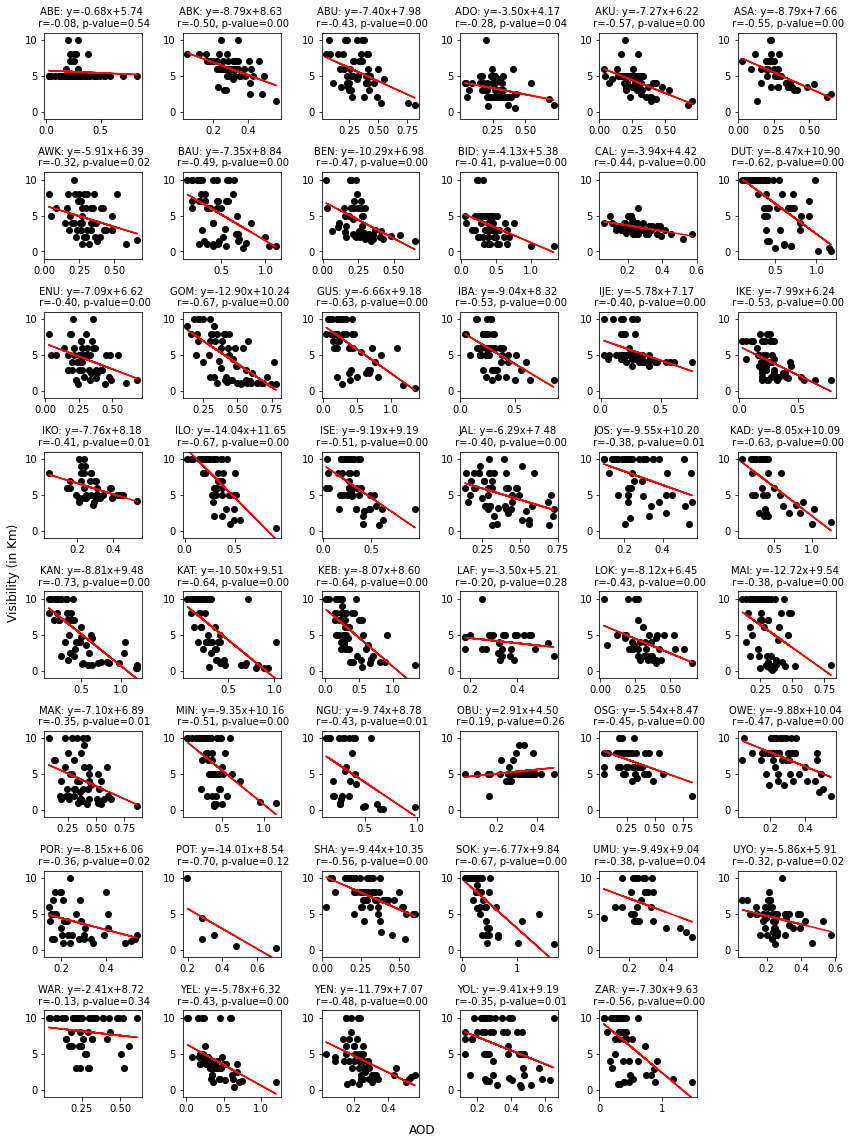

In [13]:
# plt.rc('font', family='serif')
# plt.rc('xtick', labelsize='x-small')
# plt.rc('ytick', labelsize='x-small')

cor_ls = []

fig = plt.figure(figsize=(12,16))
# fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, j in enumerate(stn):
    merged = pd.concat([vis[[j]], day1_lead_all_t[[j]]], axis=1)
    merged.columns = ["Visibility", "AOD"]
    a=merged.dropna()
#     regression part
    slope, intercept, r_value, p_value, std_err = stats.linregress(list(a['AOD']),list(a['Visibility']))
    line = (slope*a['AOD'])+intercept
    
    # append correlation
    cor_ls.append([stn_lat[i], stn_lon[i], j, round(r_value, 2), round(p_value, 2)])
    
    ax = fig.add_subplot(8,6,i+1, )
    ax.scatter(merged['AOD'], merged['Visibility'], color = 'k')
    ax.plot(list(a['AOD']), line, 'r')
    title = j+': y={:.2f}x+{:.2f} \n '.format(slope,intercept)  + 'r={:.2f}, '.format(r_value) + 'p-value={:.2f}'.format(p_value)

    ax.set_title(title, fontsize = 10)
#     ax.set_xlim([0, 1.5])
    ax.set_ylim([-1, 11])
    
#     ax.set_ylabel('Visibility (in Km)')
#     ax.set_xlabel('bbb')
# fig.suptitle('a')
fig.supxlabel('AOD')
fig.supylabel('Visibility (in Km)')
fig.tight_layout(rect=(0.0,0,1,1))
    
# plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
# plt.xlabel("common X")
# plt.ylabel("common Y")    
#     plt.subplot(7,7,i+1)
#     plt.scatter(merged['AOD'], merged['Visibility'], color = 'k', ls='solid')
#     plt.title(j)
# plt.xlabel('AOD')
# plt.ylabel('Visibility (in Km)')
#     plt.text(j)
#     for j in stn:
        
#         plt.subplot(2, 3, i)
#         plt.scatter(merged['AOD'], merged['Visibility'])
# # #         plt.text(0.5, 0.5, str((2, 3, i)),
# # #                  fontsize=18, ha='center')
            


# # fig = plt.figure(figsize=(3,3))
# fig, axs = plt.subplots(nrows=7, ncols=7, figsize=(15,15))
# plt.subplots_adjust(hspace=0.2)
# for j, ax in zip(stn, axs.ravel()):
#     print(j, ax)
#     merged = pd.concat([vis[[j]], day1_lead_all_t[[j]]], axis=1)
#     merged.columns = ["Visibility", "AOD"]
# #     merged['AOD'].scatter(merged['Visibility'],ax=ax)
#     plt.scatter(merged['AOD'], merged['Visibility'],ax=ax)
# #     plt.figure()
# #     plt.scatter(merged['AOD'], merged['Visibility'],color='k', ls='solid')
# #     plt.show()
    
    

In [14]:
cor_df = pd.DataFrame(cor_ls, columns=["Lat", "Long", "Station", "r_value", "p_value"])
cor_df['p'] = 2
cor_df.loc[cor_df['p_value'] > 0.05, 'p'] = 1
cor_df

,Lat,Long,Station,r_value,p_value,p
0,7.20,3.33,ABE,-0.08,0.54,1
1,6.25,8.19,ABK,-0.50,0.00,2
2,9.00,7.20,ABU,-0.43,0.00,2
3,7.60,5.20,ADO,-0.28,0.04,2
4,7.20,5.30,AKU,-0.57,0.00,2
5,6.82,6.23,ASA,-0.55,0.00,2
6,6.20,7.07,AWK,-0.32,0.02,2
7,10.28,9.82,BAU,-0.49,0.00,2
8,6.33,5.60,BEN,-0.47,0.00,2
9,9.80,6.00,BID,-0.41,0.00,2


In [15]:
# cor_df.to_csv("cor_files/day1/ncep_ngac_1d.csv", index=False)
cor_df.to_csv("cor_files/day2/ncep_ngac_2d.csv", index=False)
# cor_df.to_csv("cor_files/day3/ncep_ngac_3d.csv", index=False)

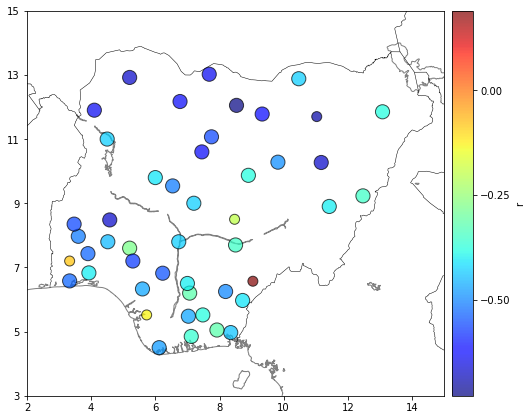

In [16]:
# plot coastlines with Basemap
plt.figure(figsize=(8, 8))
m = Basemap(projection='cyl', resolution='h',
llcrnrlat=3, urcrnrlat=15,
llcrnrlon=2, urcrnrlon=15)
# m.drawmapboundary(fill_color='#DDEEFF')
# m.fillcontinents(color='#FFEEDD')
m.drawcoastlines(color='grey', zorder=2)
m.drawcountries(color='black', zorder=2)
# m.shadedrelief()
m.drawstates()

# m.readshapefile('./nigeria_states/nigeria_states', 'nigeria_states')

# plot locations
m.scatter(cor_df["Long"], cor_df["Lat"], latlon=True, 
          c=cor_df["r_value"], s=cor_df["p"]*100,
          edgecolors="black", zorder=3,
          cmap='jet', alpha=0.7)

# create colorbar and legend
m.colorbar(label=r'r', ticks=np.linspace(1, -1, 9), shrink=0.755)
# plt.set_ticks(np.linspace(1, -1, 9))
plt.xticks(range(2, 16, 2))
plt.yticks(range(3, 16, 2))
plt.show()